In [102]:
import cv2 as cv
from google.colab.patches import cv2_imshow as show
import matplotlib.pyplot as plt

import numpy as np
from math import cos, sin, sqrt

COLOR = (255, 0, 0) # BLUE
THICKNESS = 3

In [103]:
def closest_elem_idx(arr, val):
  min_diff, min_idx = 10000000, -1

  for i, elem in enumerate(arr):
    curr_diff = abs(elem - val)
    # print("Diff: ", curr_diff)
    if min_diff > curr_diff:
      min_diff = curr_diff
      min_idx = i

  return min_idx    

def extract_line_intercepts(acc, rhos, thetas, threshold):
  intercepts = []
  
  for rho_idx in range(len(acc)):
    for theta_idx in range(len(acc[0])):
      if acc[rho_idx][theta_idx] > threshold:
        theta = thetas[theta_idx] if thetas[theta_idx] > 0 else 0.01
        if theta == np.deg2rad(0):
          theta = np.deg2rad(0.01)
        elif theta == np.deg2rad(90):
          theta = np.deg2rad(89.97)
        rho = rhos[rho_idx]

        x_intercept = rho / np.cos(theta)
        y_intercept = rho / np.sin(theta)
        intercepts.append((x_intercept, y_intercept))

  return intercepts

def visualize_hough(acc):
  plt.imshow(acc,cmap="jet",aspect='auto')
  plt.title('Hough Transform')
  plt.xlabel('Angles')
  plt.ylabel('Distance from center')
  plt.show()

def hough_line(canny_img, n_thetas, n_rhos, threshold):
  n_rows, n_cols = canny_img.shape
  diag_dist = sqrt(n_rows ** 2 + n_cols ** 2)
  
  # print(diag_dist)
  theta_range = np.deg2rad(np.linspace(-90, 90, n_thetas))
  rho_range = np.linspace(-diag_dist, diag_dist, n_rhos)
  acc = np.zeros((n_rhos, n_thetas))

  for row_idx in range(n_rows):
    for col_idx in range(n_cols):
      pixel = canny_img[row_idx][col_idx]

      if pixel > 0:
        # print("Hello is pixel > 0")
        for theta_idx in range(n_thetas):
          theta = theta_range[theta_idx]

          calc_rho = col_idx * np.cos(theta) + row_idx * np.sin(theta)
          rho_idx = closest_elem_idx(rho_range, calc_rho)
          # print(calc_rho, rho_range[rho_idx])
          
          acc[rho_idx][theta_idx] += 1

  # for row in acc:
  #   print(max(row))
  visualize_hough(acc)

  return extract_line_intercepts(acc, rho_range, theta_range, threshold)
  

In [104]:
def draw_lines(img, intercepts):
  draw_on = img.copy()
  for x_intercept, y_intercept in intercepts:
    cv.line(draw_on, (int(x_intercept), 0), (0, int(y_intercept) + 100), COLOR, THICKNESS, cv.LINE_AA)
  return draw_on

In [105]:
def preprocess(img):
  gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  ret, thresh = cv.threshold(gray_img, 180, 255, cv.THRESH_BINARY_INV)
  return cv.Canny(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

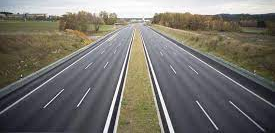

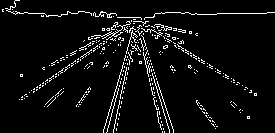

In [116]:
img = cv.imread('/content/road_img5.jpeg')[50:,:]
show(img)
canny = preprocess(img)
print()
show(canny)

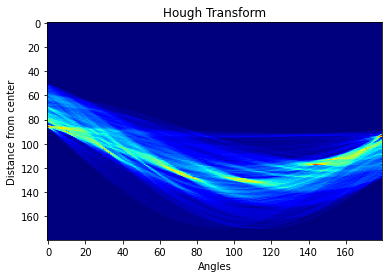

0


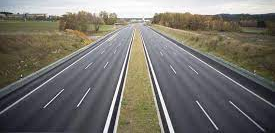

In [117]:
line_intercepts = hough_line(canny, 180, 180, 200)
print(len(line_intercepts))
output = draw_lines(img, line_intercepts)
show(output)